<a href="https://colab.research.google.com/github/waheeb123/Covid_test/blob/main/work_on_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is my first try to work on my final project using KNN

First of all let's read the data

Research Question:
Can we predict customer satisfaction (Satisfaction) based on various factors, including geographical location, industry, and complaint type, in the context of the provided dataset?

Justification:
Understanding and predicting customer satisfaction is a crucial task for various industries, including retail, services, and customer-oriented businesses. By analyzing this data, we can gain insights into factors influencing customer satisfaction and potentially improve customer service and business performance.

Data Sources:
You mentioned the dataset, but you didn't specify the source. Assuming it's publicly available, please provide a link to the source. If you collected the data yourself, provide details on the data collection process.

Libraries Potentially Being Used:
For this analysis, you may use several Python libraries:

Pandas: For data manipulation and preprocessing.
Scikit-Learn: For K-nearest neighbors (KNN) modeling and machine learning.
Matplotlib and Seaborn: For data visualization.
Numpy: For numerical operations.
EDA and Summary Statistics:

Here's a basic outline of the exploratory data analysis (EDA) and summary statistics you can perform on your dataset:

Data Cleaning and Preprocessing:
Handle missing values, if any, in the dataset.
Convert data types (e.g., dates to datetime objects).
Encode categorical variables (e.g., one-hot encoding for Industry, Complaint Type).
Descriptive Statistics:
Calculate summary statistics for numerical variables (Longitude, Latitude, Restitution, etc.).
Explore distribution of Restitution and Satisfaction.
Analyze the distribution of categorical variables (e.g., Industry, Complaint Type).
Data Visualization:
Create visualizations like histograms, box plots, and scatter plots to better understand the data distribution and relationships.
Visualize the geographical distribution of businesses using Longitude and Latitude.
Feature Selection:
Identify potentially relevant features for predicting customer satisfaction. You can use correlation matrices and other methods for feature selection.
KNN Modeling:
Split the data into training and testing sets.
Train a KNN model with different k values and evaluate its performance.
Use evaluation metrics such as accuracy, precision, recall, and F1-score to assess the model's performance.
Conclusions and Insights:
Summarize your findings and insights regarding what factors may influence customer satisfaction based on the KNN model's results.
Remember that this is a simplified roadmap for analysis, and you may need to adapt it based on the specific characteristics of your data and research objectives. Additionally, if you provide the source of your data, I can offer more detailed guidance on data cleaning and preprocessing.

## **Read the data**

The data that i have gathered are from this website.
**Consumer Services Mediated Complaints Dataset**

You can access the [Consumer Services Mediated Complaints Dataset](https://data.cityofnewyork.us/Business/Consumer-Services-Mediated-Complaints/nre2-6m2s) on the official New York City Open Data website.

Description: This dataset contains information about consumer services mediated complaints in New York City.


Import libraries

my start here for the project

In [238]:
# Import necessary libraries
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import seaborn as sns


In [239]:

df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Datasets/main/Consumer_Services_Mediated_Complaints_20231023.csv")

In [240]:
df.shape

(24294, 17)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24294 entries, 0 to 24293
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Business Name          23524 non-null  object 
 1   Industry               24294 non-null  object 
 2   Complaint Type         22354 non-null  object 
 3   Mediation Start Date   24293 non-null  object 
 4   Mediation Close Date   24294 non-null  object 
 5   Complaint Result       24294 non-null  object 
 6   Satisfaction           20272 non-null  object 
 7   Restitution            24294 non-null  object 
 8   Business Building      22563 non-null  object 
 9   Business Street        22154 non-null  object 
 10  Building Address Unit  4311 non-null   object 
 11  Business City          22626 non-null  object 
 12  Business State         22627 non-null  object 
 13  Business Zip           22627 non-null  object 
 14  Complainant Zip        22279 non-null  object 
 15  Lo

In [242]:
df.head(5)

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip,Longitude,Latitude
0,DOLLAR MAGIC LLC,Misc Non-Food Retail - 817,Surcharge/Overcharge - S02,09/19/2014,10/08/2014,Credit Card Refund and/or Contract Cancelled -...,Yes,2.00,2050,LEXINGTON AVE,NaN,NEW YORK,NY,10035,10002,NaN,NaN
1,"CHARLES P. ROGERS & CO., INC.",Furniture Sales - 242,Billing Dispute - B02,09/29/2020,10/15/2020,Advised to Sue - ATS,No,0.00,26,W 17TH ST,NaN,NEW YORK,NY,10011,07605,NaN,NaN
2,INTERNATIONAL TOWING & RECOVERY INC.,Tow Truck Company - 124,Misrepresentation - M01,06/11/2021,07/08/2021,Cash Amount - AMT,Yes,250.00,21525,99TH AVE,NaN,QUEENS VLG,NY,11429,11801,-73.743803,40.714552
3,XIOS,Wearing Apparel - 450,Exchange Goods/Contract Cancelled - E01,02/19/2015,04/08/2015,Complaint Invalid - CIN,NaN,0.00,54,GRAHAM AVE,NaN,BROOKLYN,NY,11206,11206,-73.942421,40.702664
4,FARFAN MARITZA,Employment Agency - 034,Exchange Goods/Contract Cancelled - E01,10/22/2019,11/12/2019,Cash Amount - AMT,Yes,130.00,8912,ROOSEVELT AVE,BSMT,JACKSON HEIGHTS,NY,11372,11420,-73.877552,40.748297


In [243]:
df.describe()

,Longitude,Latitude
count,13890.000000,13890.000000
mean,-73.923504,40.725574
std,0.087303,0.080899
min,-77.519854,40.112489
25%,-73.981322,40.668737
50%,-73.927984,40.733847
75%,-73.867283,40.767007
max,-73.700715,40.910679


it looks like all nonnumerical variables had been dropped.

In [244]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe()

Index(['Business Name', 'Industry', 'Complaint Type', 'Mediation Start Date',
       'Mediation Close Date', 'Complaint Result', 'Satisfaction',
       'Restitution', 'Business Building', 'Business Street',
       'Building Address Unit', 'Business City', 'Business State',
       'Business Zip', 'Complainant Zip '],
      dtype='object')


,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip
count,23524,24294,22354,24293,24294,24294,20272,24294,22563,22154,4311,22626,22627,22627,22279
unique,12730,83,72,1745,2382,26,3,1783,4924,3374,944,849,47,1299,1852
top,P.C. RICHARD & SON LONG ISLAND CORPORATION,Home Improvement Contractor - 100,Misrepresentation - M01,04/01/2022,09/02/2014,Advised to Sue - ATS,Yes,0.00,PO BOX,BROADWAY,2,NEW YORK,NY,10001,11234
freq,160,4015,3217,71,31,4230,12244,17136,475,496,286,4658,18958,486,329


let,s drop some columns we do not need

In [245]:
df.columns

Index(['Business Name', 'Industry', 'Complaint Type', 'Mediation Start Date',
       'Mediation Close Date', 'Complaint Result', 'Satisfaction',
       'Restitution', 'Business Building', 'Business Street',
       'Building Address Unit', 'Business City', 'Business State',
       'Business Zip', 'Complainant Zip ', 'Longitude', 'Latitude'],
      dtype='object')

let's drop columns that are not use3ful for the project

In [246]:
df.columns

Index(['Business Name', 'Industry', 'Complaint Type', 'Mediation Start Date',
       'Mediation Close Date', 'Complaint Result', 'Satisfaction',
       'Restitution', 'Business Building', 'Business Street',
       'Building Address Unit', 'Business City', 'Business State',
       'Business Zip', 'Complainant Zip ', 'Longitude', 'Latitude'],
      dtype='object')

In [247]:
columns_to_drop = [
    'Business Name', 'Business Building', 'Business Street',
    'Building Address Unit', 'Business City', 'Business State',
    'Business Zip', 'Complainant Zip ', 'Longitude', 'Latitude'
]
df = df.drop(columns=columns_to_drop)

In [248]:
df.head()

,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution
0,Misc Non-Food Retail - 817,Surcharge/Overcharge - S02,09/19/2014,10/08/2014,Credit Card Refund and/or Contract Cancelled -...,Yes,2.00
1,Furniture Sales - 242,Billing Dispute - B02,09/29/2020,10/15/2020,Advised to Sue - ATS,No,0.00
2,Tow Truck Company - 124,Misrepresentation - M01,06/11/2021,07/08/2021,Cash Amount - AMT,Yes,250.00
3,Wearing Apparel - 450,Exchange Goods/Contract Cancelled - E01,02/19/2015,04/08/2015,Complaint Invalid - CIN,NaN,0.00
4,Employment Agency - 034,Exchange Goods/Contract Cancelled - E01,10/22/2019,11/12/2019,Cash Amount - AMT,Yes,130.00


In [249]:
# show unique values
df['Satisfaction'].unique()

array(['Yes', 'No', nan,
       'Credit Card Refund and/or Contract Cancelled - CRC'], dtype=object)

In [250]:
# new column
df['IsSatisfied'] = df['Satisfaction'].apply(lambda x: 1 if x== "Yes" else 0)

# rename column
df.rename(columns = {'Complaint Result':'ComplaintResult'}, inplace = True)

# unique values
df['ComplaintResult'].unique()

array(['Credit Card Refund and/or Contract Cancelled - CRC',
       'Advised to Sue - ATS', 'Cash Amount - AMT',
       'Complaint Invalid - CIN', 'Goods Received - GDR',
       'Goods Repaired - GRS', 'Referred to Outside - RTO',
       'No Business Response - NVR', 'Referred to Hearing - RTH',
       'No Satisfactory Agreement - NSA',
       'Resolved and Consumer Satisfied - SPF', 'Store Credit - SCR',
       'Bill Reduced - BLR', 'No Consumer Response - NCR',
       'Consumer Withdrew Complaint - CWC',
       'Unable to Locate Business - ULV', 'Goods Exchanged - GEX',
       'Consumer Took Action - CTA', 'No Satisfactory Preempted - NSP',
       'Out of Business - OOB', 'Agency Collected Judgement - ACJ',
       'Unable to Locate Consumer - ULC',
       'Referred to Manufacturer - RMF', 'Proof of Claim - POC',
       'Cash Amount - Consumer Restitution from Escrow', '02/25/2019'],
      dtype=object)

In [251]:
# unique values
df['Industry'].unique()

array(['Misc Non-Food Retail - 817', 'Furniture Sales - 242',
       'Tow Truck Company - 124', 'Wearing Apparel - 450',
       'Employment Agency - 034', 'Other', 'Electronic Store - 001',
       'Dry Cleaners - 230', 'Storage Warehouse - 120',
       'Home Improvement Contractor - 100', 'Laundry - 064',
       'Travel Agency - 440', 'Debt Collection Agency - 122',
       'Secondhand Dealer Auto - 005', 'Retail Store - 820',
       'Hardware-Retail - 811', 'Appliances - 244',
       'Fuel Oil Dealer - 814', 'Ticket Seller',
       'Tickets-Live Perf - 260', 'Laundries', 'Locksmith - 062',
       'Jewelry Store-Retail - 823', 'Restaurant - 818',
       'Supermarket - 819', 'Garage - 049', 'Sightseeing Guide - 021',
       'Electronic & Home Appliance Service Dealer - 115',
       'Auto Dealership - 212', 'Mailorder Misc - 319',
       'Catering Establishment - 075', 'Health Spa - 839',
       'Grocery-Retail - 808', 'Secondhand Dealer [General] - 006',
       'Pedicab Driver - 131', 'H

In [252]:
# business percentages
top_industries = df['Industry'].value_counts(normalize=True) * 100

top_industries.head(10)

Home Improvement Contractor - 100    16.526714
Misc Non-Food Retail - 817            8.829341
Furniture Sales - 242                 8.635877
Electronic Store - 001                8.253067
Tow Truck Company - 124               7.956697
Secondhand Dealer Auto - 005          7.656211
Debt Collection Agency - 122          7.285750
Garage - 049                          4.651354
Other                                 3.091298
Dry Cleaners - 230                    2.082819
Name: Industry, dtype: float64

In [253]:
# drop 'Other' rows in Industry column
df = df[df.Industry != "Other"]

# create new dataframe on condition
df_satisfied = df[df.IsSatisfied == 1]

# complaint result percentages
satisfied_result = df_satisfied['ComplaintResult'].value_counts(normalize=True) * 100

satisfied_result

Resolved and Consumer Satisfied - SPF                 34.168699
Cash Amount - AMT                                     31.805567
Bill Reduced - BLR                                     9.065680
Credit Card Refund and/or Contract Cancelled - CRC     7.745354
Goods Exchanged - GEX                                  4.936507
Goods Repaired - GRS                                   4.776722
Store Credit - SCR                                     4.213271
Goods Received - GDR                                   2.909764
Agency Collected Judgement - ACJ                       0.378437
Name: ComplaintResult, dtype: float64

In [254]:
# create new dataframe on condition
df_not_satisfied = df[df.IsSatisfied == 0]

# complaint result percentages
not_satisfied_result = df_not_satisfied['ComplaintResult'].value_counts(normalize=True) * 100

not_satisfied_result

Advised to Sue - ATS                              34.989701
Referred to Outside - RTO                          9.998284
No Satisfactory Agreement - NSA                    9.191555
No Business Response - NVR                         9.174391
No Consumer Response - NCR                         8.187436
Referred to Hearing - RTH                          7.080330
Consumer Took Action - CTA                         6.179197
Unable to Locate Business - ULV                    5.973223
Complaint Invalid - CIN                            4.582904
No Satisfactory Preempted - NSP                    1.295915
Consumer Withdrew Complaint - CWC                  1.270168
Out of Business - OOB                              1.150017
Referred to Manufacturer - RMF                     0.695160
Unable to Locate Consumer - ULC                    0.205973
Proof of Claim - POC                               0.008582
Cash Amount - Consumer Restitution from Escrow     0.008582
02/25/2019                              

Over half of the unsuccessful mediation process cases seem to have continued to court. Also it seems that in unsuccessful mediation data there are no cases where financial compensation was supposedly offered or received.

Next we print out industries with most successful mediation process cases by percentage. As the list would be quite long, we print out only the top five industries

In [255]:
# industry percentages
satisfied_industry = df_satisfied['Industry'].value_counts(normalize=True) * 100

# print first five industries
satisfied_industry.head()

Debt Collection Agency - 122         13.968548
Electronic Store - 001                9.578673
Home Improvement Contractor - 100     9.351610
Misc Non-Food Retail - 817            8.998402
Tow Truck Company - 124               8.712472
Name: Industry, dtype: float64

"Well that's a surprise" was my primary reaction to the top industry here. What about the unsuccessful mediation process cases?

In [256]:
# industry percentages
not_satisfied_industry = df_not_satisfied['Industry'].value_counts(normalize=True) * 100

not_satisfied_industry.head()

Home Improvement Contractor - 100    24.914178
Furniture Sales - 242                 9.543426
Misc Non-Food Retail - 817            9.225884
Secondhand Dealer Auto - 005          8.161689
Tow Truck Company - 124               7.698249
Name: Industry, dtype: float64

As perhaps not so big a surprise, home improvement contractors and furniture retail sales produce most unsuccessful mediation cases in customer complaints.

### **ANALISIS**

Naturally the number of mediation cases per industry varies greatly, so it would be more useful to know for example what percentage of home improvement contractor complaints are resolved successfully. To do this, we first create a list of all unique industries and use it as the first column in new dataframe df_industries.

In [257]:
# create industry list
industry_list = df['Industry'].unique()

# new dataframe with empty column Industry
df_industries = pd.DataFrame(columns=["Industry"])

# add column values from list
df_industries['Industry'] = np.array(industry_list)

# sort values alphabetically
df_industries = df_industries.sort_values('Industry')

# reset dataframe index and drop the earlier index column
df_industries.reset_index(inplace = True, drop = True)

df_industries.head()

,Industry
0,Amusement Device (Portable) - 018
1,Appliances - 244
2,Auction House - 128
3,Auctioneer - 036
4,Auto Dealership - 212


**Industry percentage**

Just to clarify, the number included in the Industry column is the unique ID of that specific industry in the original dataset, but these ID numbers are not used in this notebook. Next we will add the mediation case count of each industry. For this we need the value count of each industry in alphabetic order, because this way the industry order will be exactly the same as in our dataframe df_industries. After that the values are added to dataframe as Industry_Count column.

In [258]:
# industry count sorted in alphabetic order
industry_count = df['Industry'].value_counts().sort_index(ascending=True)

# add column
df_industries['Industry_Count'] = np.array(industry_count)

df_industries.head(7)

,Industry,Industry_Count
0,Amusement Device (Portable) - 018,1
1,Appliances - 244,444
2,Auction House - 128,57
3,Auctioneer - 036,14
4,Auto Dealership - 212,24
5,Auto Leasing - 211,10
6,Auto Rental - 213,147


In [259]:
df_industries.shape

(82, 2)

We have 82 different industries altogheter, which is good to know. In our original data dataframe we created a new column IsSatisfied to describe the outcome of the mediation process. Next we group all satisfied cases by individual industry and store the result in a new dataframe df_satisfied_industries.

In [260]:
# group results on industry
df_satisfied_industries = df[df['IsSatisfied'] == 1].groupby(['Industry']).size().reset_index(name='Satisfied')

df_satisfied_industries.head()

,Industry,Satisfied
0,Appliances - 244,272
1,Auction House - 128,21
2,Auctioneer - 036,7
3,Auto Dealership - 212,13
4,Auto Leasing - 211,4


In [261]:
df_satisfied_industries.shape

(72, 2)

Now the number of individual industries is 72, meaning not all industries in our original dataframe were included.

This is why to merge the two dataframes we may use the Industry column, but to preserve all data, the method of merging these two dataframes must be set to "outer". This preserves all 82 individual industries, but in the Satisfied column to be created in the dataframe df_merged this will result as six NaN values.

To handle these rows, we replace these values with a value zero, which tells us that there were no satisfied cases related to those six industries.

In [262]:
# merge dataframes
df_merged = pd.merge(df_industries, df_satisfied_industries, on = "Industry", how = "outer")

# replace NaN values with 0
df_merged['Satisfied'] = df_merged['Satisfied'].fillna(0)

# convert values to integer
df_merged['Satisfied'] = df_merged['Satisfied'].astype(int)

df_merged.head()

,Industry,Industry_Count,Satisfied
0,Amusement Device (Portable) - 018,1,0
1,Appliances - 244,444,272
2,Auction House - 128,57,21
3,Auctioneer - 036,14,7
4,Auto Dealership - 212,24,13


In [263]:
df_merged.shape

(82, 3)

The number of rows looks correct, so next we can repeat the same process on unsuccessful mediation process cases. For consistency, we will keep calling the resulting dataframe df_merged.

In [264]:
# group results on industry
df_not_satisfied_industries = df[df['IsSatisfied'] == 0].groupby(['Industry']).size().reset_index(name='Not_Satisfied')

# merge dataframe
df_merged = pd.merge(df_merged, df_not_satisfied_industries, on = "Industry", how = "outer")

# replace NaN values with 0
df_merged['Not_Satisfied'] = df_merged['Not_Satisfied'].fillna(0)

# convert values to integer
df_merged['Not_Satisfied'] = df_merged['Not_Satisfied'].astype(int)

df_merged.head()

,Industry,Industry_Count,Satisfied,Not_Satisfied
0,Amusement Device (Portable) - 018,1,0,1
1,Appliances - 244,444,272,172
2,Auction House - 128,57,21,36
3,Auctioneer - 036,14,7,7
4,Auto Dealership - 212,24,13,11


Adding the values in Satisfied and Not_Satisfied columns seem to match the ones in Industry_Count, so there's no problem there. Next we calculate the percentage of satisfied mediation cases and store the result in a new column Satisfied_Perc.

In [265]:
# calculate percentage
df_merged['Satisfied_Perc'] = ((df_merged['Satisfied'] / df_merged['Industry_Count']*100).round(1))

df_merged.head()

,Industry,Industry_Count,Satisfied,Not_Satisfied,Satisfied_Perc
0,Amusement Device (Portable) - 018,1,0,1,0.0
1,Appliances - 244,444,272,172,61.3
2,Auction House - 128,57,21,36,36.8
3,Auctioneer - 036,14,7,7,50.0
4,Auto Dealership - 212,24,13,11,54.2


As we are interested in industries with most overall mediation cases, we sort the dataframe on Industry_Count from highest to lowest. After that we create a new dataframe df_plot_perc, which will be used in plotting the Top-10 selection of our results.

In [266]:
# sort values from highest to lowest
df_merged = df_merged.sort_values(by ='Industry_Count', ascending=False)

# create new dataframe for plotting
# select first ten rows
df_plot_perc = df_merged.iloc[:10,:]

df_plot_perc.head(10)

,Industry,Industry_Count,Satisfied,Not_Satisfied,Satisfied_Perc
33,Home Improvement Contractor - 100,4015,1112,2903,27.7
47,Misc Non-Food Retail - 817,2145,1070,1075,49.9
24,Furniture Sales - 242,2098,986,1112,47.0
19,Electronic Store - 001,2005,1139,866,56.8
77,Tow Truck Company - 124,1933,1036,897,53.6
62,Secondhand Dealer Auto - 005,1860,909,951,48.9
13,Debt Collection Agency - 122,1770,1661,109,93.8
26,Garage - 049,1130,696,434,61.6
16,Dry Cleaners - 230,506,214,292,42.3
17,Electronic & Home Appliance Service Dealer - 115,463,214,249,46.2


Before plotting we sort the dataframe again, now by using the Satisfied_Perc column. As a result we get the most represented industries in the dataset sorted by their satisfaction percentage.

In [267]:
# sort values from highest to lowest
df_plot_perc = df_plot_perc.sort_values(by ='Satisfied_Perc', ascending=False)

# define parameters
fig = px.bar(df_plot_perc, x='Industry', y='Satisfied_Perc', text = 'Satisfied_Perc',
            hover_data= ['Satisfied'], color= 'Satisfied_Perc', height = 600)

# set graphics
fig.data[0].marker.line.width = 0.5
fig.data[0].marker.line.color = "black"

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_mode='hide')

fig.update_layout(
    yaxis=dict(
        showline=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Verdana',
            size=12,
            color='rgb(82, 82, 82)',
        )))



# set plot title
fig.update_layout(
    title='<b>NYC Consumer satisfaction</b>:<br>Satisfaction percentage per industry',
                font=dict(family='verdana',
                                size=12,
                                color='rgb(64,64,64)'))

# set axis titles etc.
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

fig.update_yaxes(title_text='Satisfaction Percentage')
fig.update_xaxes(title_text='Industry')

fig.update_layout(coloraxis_colorbar=dict(
    title="Percentage"
))

fig.update_yaxes(title_font=dict(size=16))
fig.update_xaxes(title_font=dict(size=16))

# show figure
fig.show()

With debt collection agencies leading the pack with a staggering 93.8-percent satisfaction percentage and home improvement contractors in the other end, we may move on to different types of compensation the customers received in the mediation process.

**Restitution **

According to dataset dictionary, the values in Restitution column describe the "total amount of consumer restitution secured through mediation". This means that not only cash and credit refunds are included, but also for example the calculated value of store credit or goods received can be defined as restitution.

To examine the matter further, we take only the part of data where the mediation process was successful. After all, we know already from our earlier work that no unsuccessful mediation cases resulted as any kind of financial compensation to complainants.

Thus all the data we need is stored in dataframe df_satisfied. We start by changing the Restitution column format to numeric (float). Because we are interested in complainants who actually received restitution, we then select rows where the value of restitution was larger than zero. Finally we check the percentiles of the column in question.

In [268]:
df_satisfied['Restitution'] = df_satisfied['Restitution'].astype(float)
df_satisfied = df_satisfied.loc[df_satisfied['Restitution'] > 0]


<ipython-input-268-2111d1711598>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
# Change format to float
df_satisfied['Restitution'] = df_satisfied['Restitution'].astype(float)

# Select values
df_satisfied = df_satisfied.loc[df_satisfied['Restitution'] > 0]

# Check percentiles
df_satisfied['Restitution'].describe(percentiles=[.25, .5, .75, .99])


<ipython-input-269-24fd68e66140>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count      6947.000000
mean       1439.910033
std        5073.233875
min           1.000000
25%          82.000000
50%         258.000000
75%         893.500000
99%       23670.660000
max      132616.000000
Name: Restitution, dtype: float64

75 percent of all restitution values included in the data are 890 USD or less, so the maximum value - over one million dollars - seems indeed interesting. Let's take a closer look at that.

In [270]:
max_restitution = df_satisfied[df_satisfied.Restitution == 132616.000000]

max_restitution.head()

,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,ComplaintResult,Satisfaction,Restitution,IsSatisfied
7526,Debt Collection Agency - 122,Billing Dispute - B02,12/13/2014,01/06/2015,Bill Reduced - BLR,Yes,132616.0,1


It is easy to see why that particular debt collection agency customer gave thumbs up to the mediation process. Based on percentiles, it might be useful to divide the restitution values into bins per restitution amount. We will add the bins as new column Bins to our df_satisfied dataframe.

In [271]:
# define restitution bins
bins = [1, 5, 20, 50, 100, 500, 1000, 5000, 132616]

# add bins to the dataframe as column
df_satisfied['Bins'] = pd.cut(df_satisfied['Restitution'], bins, right=False, duplicates = 'drop')

# show unique values
df_satisfied['Bins'].unique()

[[1.0, 5.0), [100.0, 500.0), [20.0, 50.0), [1000.0, 5000.0), [50.0, 100.0), [500.0, 1000.0), [5.0, 20.0), [5000.0, 132616.0), NaN]
Categories (8, interval[int64, left]): [[1, 5) < [5, 20) < [20, 50) < [50, 100) < [100, 500) <
                                        [500, 1000) < [1000, 5000) < [5000, 132616)]

Now we can calculate restitution percentages per each bin and plot the result.

In [272]:
# restitution percentages
restitution_perc = df_satisfied['Bins'].value_counts(normalize=True) * 100

restitution_perc

[100, 500)        36.164699
[1000, 5000)      17.794414
[500, 1000)       13.317017
[50, 100)         11.920530
[20, 50)           8.119781
[5000, 132616)     5.571552
[5, 20)            5.441981
[1, 5)             1.670026
Name: Bins, dtype: float64

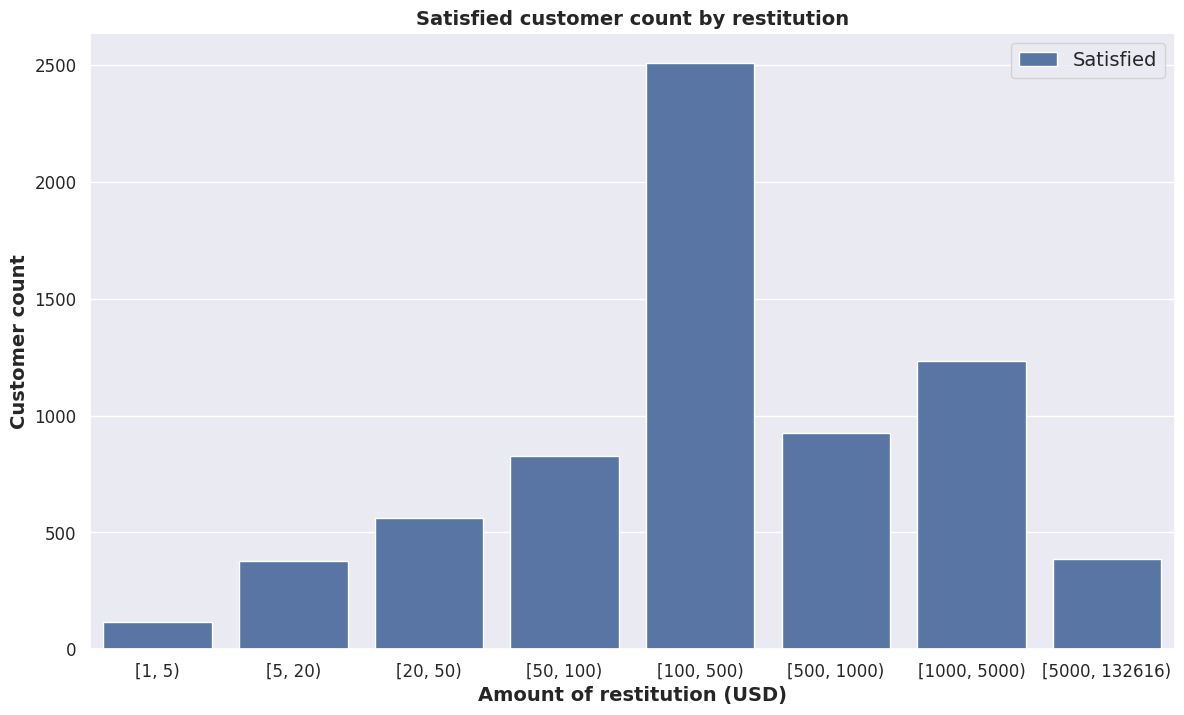

In [274]:
# Define font and label sizes
font_size = 14
label_size = 12

# Set plot size and style
colors = ["#99ff33"]
sns.set(rc={'figure.figsize':(14, 8)})

# Set plot parameters
plot = sns.countplot(x='Bins',
                     data=df_satisfied,
                     hue='IsSatisfied')

# Set plot title, labels, and tick sizes
plot.set_title("Satisfied customer count by restitution", fontsize=font_size, weight='bold')
plot.set_xlabel("Amount of restitution (USD)", fontsize=font_size, weight='bold')
plot.set_ylabel("Customer count", fontsize=font_size, weight='bold')
plot.tick_params(labelsize=label_size)

# Set the legend
plot.legend(loc='upper right', fontsize=font_size, labels=["Satisfied"])

# Show the plot
plt.show()


Most customers satisfied in the mediation process (of course also the business side was satisfied) received in one form or another a restitution between one hundred and five hundred USD. Of course the restitution is very much case-related, as horse drawn cab complaint restitution is likely to be financially smaller than in cases where the business is for example a jewelry store or a car retail company.

We know that restitution pretty much divides the data in two halves, since in the unsuccessful mediation cases no restitution was received in the first place. Next we create a simple baseline classification model based on this notion.

**Baseline model**

We start by copying our original data to a new df_model dataframe.

In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values in the 'Satisfaction' column
df = df.dropna(subset=['Satisfaction', 'ComplaintResult'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['ComplaintResult'] = label_encoder.fit_transform(df['ComplaintResult'])

# Define the features (X) and the target variable (y)
X = df[['Industry', 'ComplaintResult']]
y = df['IsSatisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with a specified number of neighbors (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance (you can use different metrics)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print(confusion)


Accuracy: 0.995929788857797
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1567
           1       1.00      1.00      1.00      2364

    accuracy                           1.00      3931
   macro avg       1.00      1.00      1.00      3931
weighted avg       1.00      1.00      1.00      3931

[[1557   10]
 [   6 2358]]


Max train score 100.0 % and k = [1]
Max test score 99.87789987789988 % and k = [1]


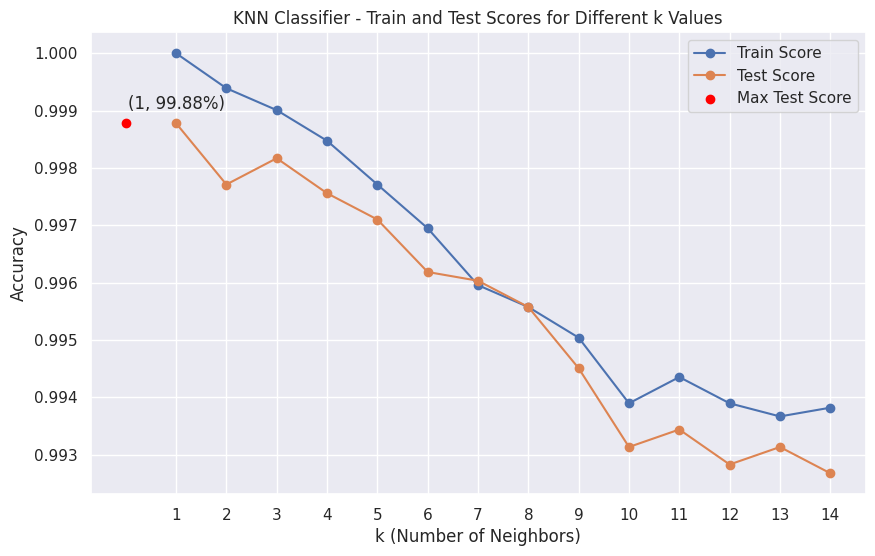

In [276]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the features (X) and the target variable (y)
X = df[['Industry', 'ComplaintResult']]
y = df['IsSatisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Lists to store training and testing scores
test_scores = []
train_scores = []

# Loop through different k values
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Find the k value with the maximum test score
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

# Plot train and test scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), train_scores, marker='o', label='Train Score')
plt.plot(range(1, 15), test_scores, marker='o', label='Test Score')

# Highlight the maximum test score
plt.scatter(test_scores_ind, [max_test_score] * len(test_scores_ind), color='red', label='Max Test Score', zorder=5)

# Annotate the maximum test score point
for i, k in enumerate(test_scores_ind):
    plt.annotate(f'({k + 1}, {max_test_score * 100:.2f}%)', (k + 1, max_test_score), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('KNN Classifier - Train and Test Scores for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 15))
plt.grid(True)
plt.legend()
plt.show()


Accuracy: 0.995929788857797
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1567
           1       1.00      1.00      1.00      2364

    accuracy                           1.00      3931
   macro avg       1.00      1.00      1.00      3931
weighted avg       1.00      1.00      1.00      3931

[[1557   10]
 [   6 2358]]
Max train score 100.00% and k = [1]
Max test score 99.92% and k = [1]


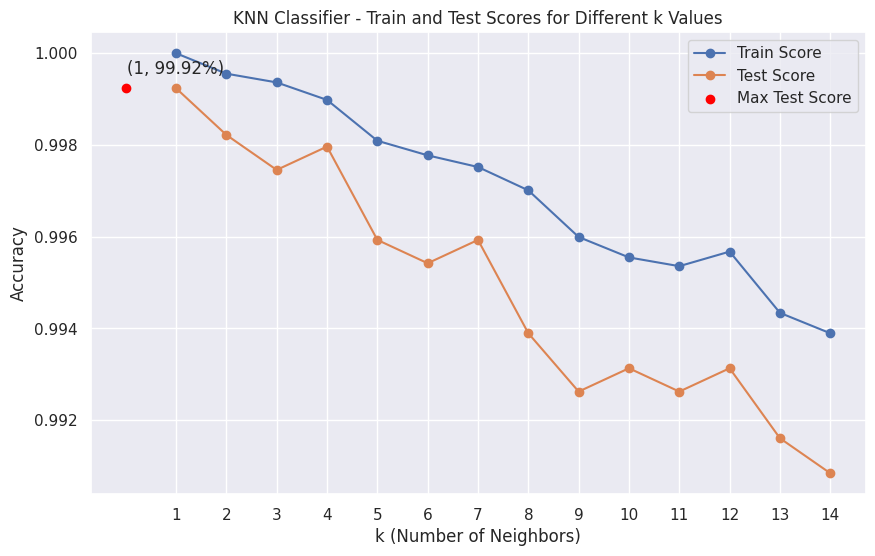

In [277]:
# Define the features (X) and the target variable (y)
X = df[['Industry', 'ComplaintResult']]
y = df['IsSatisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with a specified number of neighbors (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print(confusion)

# Find the best k value with the maximum test score
train_scores = []
test_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {:.2f}% and k = {}'.format(max_train_score * 100, [i + 1 for i in train_scores_ind]))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {:.2f}% and k = {}'.format(max_test_score * 100, [i + 1 for i in test_scores_ind]))

# Plot train and test scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), train_scores, marker='o', label='Train Score')
plt.plot(range(1, 15), test_scores, marker='o', label='Test Score')

# Highlight the maximum test score
plt.scatter(test_scores_ind, [max_test_score] * len(test_scores_ind), color='red', label='Max Test Score', zorder=5)

# Annotate the maximum test score point
for i, k in enumerate(test_scores_ind):
    plt.annotate(f'({k + 1}, {max_test_score * 100:.2f}%)', (k + 1, max_test_score), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('KNN Classifier - Train and Test Scores for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 15))
plt.grid(True)
plt.legend()
plt.show()